## 1) Usefuls Modules

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math 

from itertools import groupby
from helpers import *
from helpers_marc import *
from plots import *
import scipy
import scipy.io
import numpy as np
import scipy.sparse as sp
import csv

%load_ext autoreload
%autoreload 2
print("done")

done


## 2) Training of the SGD matrix factorization

In [5]:
### A) Load the data

# write here the path to the dataset
path_dataset = "datasets/data_train.csv"

# load the data 
ratings = load_data(path_dataset)
print("data loaded")

number of items: 10000, number of users: 1000
data loaded


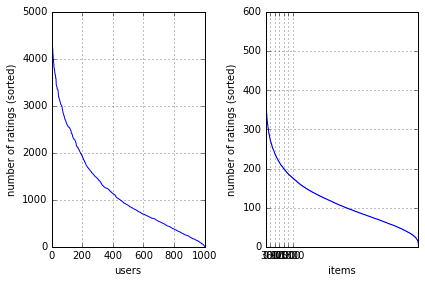

In [34]:
### B) Split the data

# First get the numbers of ratings per user and ratings per film 
# And plot these values

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

In [35]:
# then select the items and users for which there are enough data
# and split the datan into a training set and a test set

# minimal number of data per user and per item
min_num_ratings = 10 

# fraction of the data set that will be the test set 
p_test = 0.1

valid_ratings, train, test = split_data(ratings, num_items_per_user, num_users_per_item, min_num_ratings, p_test)
# plot the resulting training and test set 
#plot_train_test_data(train, test)
print("data split : done")

Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:1059171
Total number of nonzero elements in test data:117702
data split : done


In [ ]:
### C) Training : Find the best parameters for the sgd matrix factorization : K (number of features) lambda (regularization parameters)

## Parameters for the matrix factorization
# maximum number of features fixed
max_K = 30
min_K= 2
# incrementation step for K
step_K = 4

# number of full iterations of the stochastic gradient descent
max_epochs = 30

# regularization parameters (regularization of the loss function in Gradient Descent)
range_lambda_user = np.logspace(-5, -2, 4) 
range_lambda_item = np.logspace(-5, -2, 4)
#lambda_user = 1e-4
#lambda_item = 1e-4 

# descent step size
gamma = 0.1

# initialization of variables refering to the matrix factorization for the best number
best_rmse_test_sgd = float('Inf')
best_k_sgd = 0
best_user_feat_sgd = np.zeros(1)
best_item_feat_sgd = np.zeros(1)
best_lambda_user = 0
best_lambda_item =0

lambdas_rmse = []

# for each lambdas of the grid 
# for each K of the grid, compute the matrix factorization (training set) and the rmse (test set), 
# If it improves the results, update the rmse

for lambda_user in range_lambda_user:
    
    for lambda_item in range_lambda_item: 
        
        for K in range(min_K,max_K,step_K):
    
            print("matrix factorization for the number of features : ", K)

            # compute the stochastic gradient descent matrix factorization
            user_features, item_features, rmse_test = matrix_factorization_SGD(train, test, 
                                                                               K, max_epochs, lambda_user, lambda_item, gamma)
            if rmse_test < best_rmse_test_sgd:
                # better rmse => update the references
                best_rmse_test_sgd = rmse_test
                best_k_sgd = K
                best_user_feat_sgd = user_features
                best_item_feat_sgd = item_features
                best_lambda_user = lambda_user
                best_lambda_item = lambda_item

# print the results
print("best number of features found : ", best_k_sgd)
print("rmse on the test set for this number of features : ", best_rmse_test_sgd)
print("best lambda user : ", best_lambda_user)
print("best lambda item : ", best_lambda_item)

('matrix factorization for the number of features : ', 2)
learn the matrix factorization using SGD...


In [51]:
# print the results
print("best number of features found : ", best_k_sgd)
print("rmse on the test set for this number of features : ", best_rmse_test_sgd)
print("best lambda user : ", best_lambda_user)
print("best lambda item : ", best_lambda_item)

('best number of features found : ', 6)
('rmse on the test set for this number of features : ', 1.0104058955400144)
('best lambda user : ', 1.0000000000000001e-05)
('best lambda item : ', 0.0001)


## 3) Prediction

In [ ]:
## prediction using same parameters and the best number of features found previously

In [38]:
### A) Load the prediction data
path_evaluation = "datasets/sampleSubmission.csv"
ratings_submit = load_data(path_evaluation)
evaluated_on = ratings_submit.toarray()
evaluated_on = evaluated_on.astype(np.float)

number of items: 10000, number of users: 1000


In [40]:
print("best number of features found : ", best_k_sgd)
print("rmse on the test set for this number of features : ", best_rmse_test_sgd)
print("best lambda user : ", best_lambda_user)
print("best lambda item : ", best_lambda_item)

('best number of features found : ', 6)
('rmse on the test set for this number of features : ', 1.0104058955400144)
('best lambda user : ', 1.0000000000000001e-05)
('best lambda item : ', 0.0001)


In [ ]:
# compute the prediction matrix for the best k and all the ratings
# not only those for sufficient amount of data
max_epochs = 40
data_sub = ratings
user_feat_sub, item_feat_sub, rmse_test = matrix_factorization_SGD(data_sub, 
                                                                   data_sub, best_k_sgd, max_epochs, 
                                                                   best_lambda_user, best_lambda_item, gamma)

prediction = np.dot(np.transpose(item_feat_sub), user_feat_sub)
print("prediction matrix computed")

learn the matrix factorization using SGD...


In [ ]:
# compute the csv file to store the results

filename = "datasets/result_submission_sgd.csv"

matrix2file(filename, prediction, evaluated_on)


In [ ]:
print(prediction[:10,:10])

## Going further : affine the parameters research, and save the values found 

In [ ]:
## Parameters for the matrix factorization
# maximum number of features fixed
max_K = 9
min_K= 3
# incrementation step for K
step_K = 1

# number of full iterations of the stochastic gradient descent
max_epochs = 30

# regularization parameters (regularization of the loss function in Gradient Descent)
range_lambda_user = np.logspace(-6, -4, 7) 
range_lambda_item = np.logspace(-5, -3, 7)
#lambda_user = 1e-4
#lambda_item = 1e-4 

# descent step size
gamma = 0.1

# initialization of variables refering to the matrix factorization for the best number
best_rmse_test_sgd = float('Inf')
best_k_sgd = 0
best_user_feat_sgd = np.zeros(1)
best_item_feat_sgd = np.zeros(1)
best_lambda_user = 0
best_lambda_item =0

param_rmse = []

# for each lambdas of the grid 
# for each K of the grid, compute the matrix factorization (training set) and the rmse (test set), 
# If it improves the results, update the rmse

for lambda_user in range_lambda_user:
    
    for lambda_item in range_lambda_item: 
        
        for K in range(min_K,max_K,step_K):
    
            print("matrix factorization for the number of features : ", K)

            # compute the stochastic gradient descent matrix factorization
            user_features, item_features, rmse_test, rmse_train = matrix_factorization_SGD(train, test, 
                                                                               K, max_epochs, lambda_user, lambda_item, gamma)
            
            param_rmse.append((lambda_user,lambda_item,K, rmse_test, rmse_train))
            if rmse_test < best_rmse_test_sgd:
                # better rmse => update the references
                best_rmse_test_sgd = rmse_test
                best_k_sgd = K
                best_user_feat_sgd = user_features
                best_item_feat_sgd = item_features
                best_lambda_user = lambda_user
                best_lambda_item = lambda_item

('matrix factorization for the number of features : ', 3)
learn the matrix factorization using SGD...


In [57]:
print("k + précis : ", best_k_sgd)

('k + pr\xc3\xa9cis : ', 7)


In [58]:
print("lambda_user & item + precis", best_lambda_user, best_lambda_item)

('lambda_user & item + precis', 9.9999999999999995e-07, 2.1544346900318823e-05)


In [59]:
print('rmse test', best_rmse_test_sgd)

('rmse test', 1.0096982694547425)


## 4) More precised predictions 

In [14]:
# descent step size
gamma = 0.1
best_k_sgd = 7
best_lambda_user = 1e-06
best_lambda_item = 2.15443469003e-05


In [15]:
### A) Load the prediction data
path_evaluation = "datasets/sampleSubmission.csv"
ratings_submit = load_data(path_evaluation)
evaluated_on = ratings_submit.toarray()
evaluated_on = evaluated_on.astype(np.float)

number of items: 10000, number of users: 1000


In [ ]:
# compute the prediction matrix for the best k and all the ratings
# not only those for sufficient amount of data
max_epochs = 120
gamma = 0.05
data_sub = ratings
user_feat_sub, item_feat_sub, rmse_test, rmse_train = matrix_factorization_SGD(data_sub, 
                                                                   data_sub, best_k_sgd, max_epochs, 
                                                                   best_lambda_user, best_lambda_item, gamma)

prediction = np.dot(np.transpose(item_feat_sub), user_feat_sub)
print("prediction matrix computed")

learn the matrix factorization using SGD...


In [ ]:
# compute the csv file to store the results

filename = "datasets/result_submission_sgd.csv"

matrix2file(filename, prediction, evaluated_on)



In [62]:
print(param_rmse)

[(9.9999999999999995e-07, 1.0000000000000001e-05, 3, 1.014688483596708, 0.9840866305864359), (9.9999999999999995e-07, 1.0000000000000001e-05, 4, nan, nan), (9.9999999999999995e-07, 1.0000000000000001e-05, 5, 1.009789243688043, 0.9740288478970799), (9.9999999999999995e-07, 1.0000000000000001e-05, 6, 1.0101005073532552, 0.972773564207463), (9.9999999999999995e-07, 1.0000000000000001e-05, 7, 1.0097799487530221, 0.9719904699556959), (9.9999999999999995e-07, 1.0000000000000001e-05, 8, 1.0104219351248278, 0.9731610608192898), (9.9999999999999995e-07, 2.1544346900318823e-05, 3, 1.016339777132106, 0.9846944844646859), (9.9999999999999995e-07, 2.1544346900318823e-05, 4, nan, nan), (9.9999999999999995e-07, 2.1544346900318823e-05, 5, 1.0112670164301614, 0.9719864854278978), (9.9999999999999995e-07, 2.1544346900318823e-05, 6, 1.0105985750021873, 0.9719088473764599), (9.9999999999999995e-07, 2.1544346900318823e-05, 7, 1.0096982694547425, 0.9734010957831841), (9.9999999999999995e-07, 2.1544346900318

In [65]:
print(best_rmse_test_sgd)
print(best_k_sgd)
print(best_lambda_user)
print(best_lambda_item)

1.00969826945
7
1e-06
2.15443469003e-05


## 5) Measure of the RMSEs as functions of max epochs

In [24]:
#data loading and splitting 
### A) Load the data

# write here the path to the dataset
path_dataset = "datasets/data_train.csv"

# load the data 
ratings = load_data(path_dataset)
print("data loaded")

number of items: 10000, number of users: 1000
data loaded


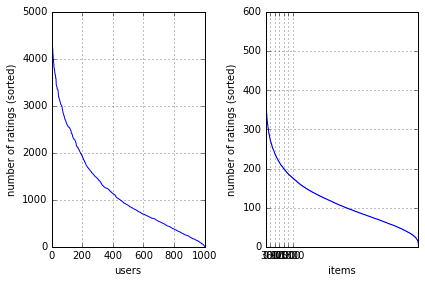

In [26]:
### B) Split the data

# First get the numbers of ratings per user and ratings per film 
# And plot these values

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

In [29]:
# Select the whole set

# minimal number of data per user and per item
min_num_ratings = 0 

# fraction of the data set that will be the test set 
p_test = 0.1

valid_ratings, train, test = split_data(ratings, num_items_per_user, num_users_per_item, min_num_ratings, p_test)
# plot the resulting training and test set 
#plot_train_test_data(train, test)
print("data split : done")

Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:1059292
Total number of nonzero elements in test data:117660
data split : done


In [ ]:
# train and test for differents max epochs and store the rmses
max_epochs = [10,20,40,60,80,120,180]

K = 7
lambda_user = 1e-06
lambda_item = 2.15*1e-05
gamma = 0.1

rmse_trains =[]
rmse_tests = []

for m in max_epochs:
    print("matrix factorization for the number of epochs : ", m)

    # compute the stochastic gradient descent matrix factorization
    user_features, item_features, rmse_test, rmse_train = matrix_factorization_SGD(train, test, 
                                                                               K, m, lambda_user, lambda_item, gamma)
    rmse_trains.append(rmse_train)
    rmse_tests.append(rmse_test)

('matrix factorization for the number of epochs : ', 10)
learn the matrix factorization using SGD...


In [37]:
print(rmse_trains)

[1.3926372706077395, 1.0818894962346253, 0.9589275181981276, 0.9581526759234594, 0.9581455203156259, 0.9581453306584408, 0.9581453305293471]


In [38]:
print(rmse_tests)

[1.4100676239214054, 1.1111336615634582, 0.9994378324623796, 0.9989724163502047, 0.9989722637026248, 0.9989722598560767, 0.9989722598536304]


40
